In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind, pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
from scipy import stats
import numpy as np
import re
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
df=w.get_explore_data()

In [4]:
df=w.get_contest_data(df)

In [5]:
#df=w.rename_data(df)

In [6]:
df.head(50)

,region,elevation,lat,lon,startdate,potential_evap,precip,barometric_pressure,all_atmos_precip,relative_humidity,...,height_10_mb,height_100_mb,height_500_mb,height_850_mb,zonal_wind_250mb,zonal_wind_925mb,long_wind_250mb,long_wind_925mb,elevation_range,region_bins
0,BSh,200,0.0,0.833333,2014-09-01,237.00,94.31,98644.97,42.45,81.72,...,31246.63,16666.81,5899.66,1535.52,-2.56,-5.22,-3.52,4.41,bottom_low,Dry
1,BSh,200,0.0,0.833333,2014-09-02,228.90,100.85,98686.80,42.66,82.56,...,31244.78,16667.31,5901.03,1538.00,-2.39,-5.20,-4.49,3.74,bottom_low,Dry
2,BSh,200,0.0,0.833333,2014-09-03,220.69,101.25,98712.85,43.23,83.29,...,31239.27,16668.39,5902.18,1540.32,-2.76,-5.00,-5.44,3.40,bottom_low,Dry
3,BSh,200,0.0,0.833333,2014-09-04,225.28,101.90,98711.70,43.11,83.26,...,31232.86,16667.39,5903.07,1541.10,-3.00,-4.61,-5.76,3.29,bottom_low,Dry
4,BSh,200,0.0,0.833333,2014-09-05,237.24,82.95,98686.46,42.98,82.50,...,31226.16,16665.65,5903.36,1539.73,-3.40,-4.25,-6.09,3.27,bottom_low,Dry
5,BSh,200,0.0,0.833333,2014-09-06,237.87,79.11,98649.75,42.98,82.46,...,31222.25,16664.20,5901.94,1536.71,-3.71,-4.00,-6.02,3.14,bottom_low,Dry
6,BSh,200,0.0,0.833333,2014-09-07,236.36,81.54,98619.14,43.28,82.68,...,31216.90,16665.01,5900.75,1534.26,-3.47,-3.99,-5.38,2.92,bottom_low,Dry
7,BSh,200,0.0,0.833333,2014-09-08,233.36,87.87,98609.42,44.12,83.11,...,31210.24,16667.35,5901.17,1533.13,-3.24,-4.02,-4.99,2.71,bottom_low,Dry
8,BSh,200,0.0,0.833333,2014-09-09,233.82,96.14,98625.38,44.46,83.35,...,31200.53,16668.39,5902.21,1533.40,-2.73,-4.26,-5.51,2.38,bottom_low,Dry
9,BSh,200,0.0,0.833333,2014-09-10,229.74,96.13,98651.15,44.37,83.54,...,31188.35,16665.66,5901.96,1534.67,-1.83,-4.38,-6.40,1.84,bottom_low,Dry


In [7]:
df.shape

(375734, 22)

In [ ]:
df['region_encoded'] = df.region.map({'BWh': 'Dry',
                                      'BWk': 'Dry',
                                      'Bsh': 'Dry',
                                      'BSk': 'Dry', 
                                      'Csa':'Temperate', 
                                      'Csb':'Temperate', 
                                      'Cfa':'Temperate', 
                                      'Cfa':'Temperate',
                                      'Dsb':'Continental', 
                                      'Dsc':'Continental', 
                                      'Dwa':'Continental', 
                                      'Dwb':'Continental', 
                                      'Dfa':'Continental', 
                                      'Dfb':'Continental', 
                                      'Dfc':'Continental'})

In [8]:
df.shape

(375734, 22)

In [9]:
train, validate, test=w.split_data(df, test_size=0.15)

In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='region_bins'=='Dry', data= train)

In [ ]:
train.head()

In [ ]:
# Using + operator to combine two columns
train["latlon"] = train['lat'].astype(str) +", "+ train["lon"].astype(str)

In [ ]:
train.head()

In [ ]:
rows = train.sample(frac =.01)

In [ ]:
sns.relplot(data=rows, x='height_500_mb', y="mean_temp")

In [22]:
regions=train.regions.unique()

AttributeError: 'DataFrame' object has no attribute 'regions'

In [ ]:
Regions 
BWh    Dry-Arid Desert-hot
BWk    Dry-Arid Desert-cold
BSh    Dry-Semi-Arid or steppe-hot
BSk    Dry-Semi-Arid or steppe-cold
Csa    Temperate-Dry summer-hot summer
Csb    Temperate-Dry summer-warm summer	
Cfa    Temperate-No dry season-hot summer
Cfb    Temperate-No dry season-warm summer
Dsb    Continental-Dry summer-warm summer
Dsc    Continental-Dry summer-cold summer
Dwa    Continental-Dry winter-hot summer
Dwb    Continental-Dry winter-warm summer
Dfa    Continental-No dry season-hot summer
Dfb    Continental-No dry season-warm summer
Dfc    Continental-No dry season-cold summer

In [ ]:
BWh
BWk
BSh
BSk
Csa
Csb
Cfa
Cfb
Dsb
Dsc
Dwa
Dwb
Dfa
Dfb
Dfc


In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='region_bins'=='Temperate', data= train)

In [ ]:
new_df= train[['height_500_mb','mean_temp']]

In [ ]:
new_df.shape

In [ ]:
sns.histplot(data=train, x="height_500_mb")

In [ ]:
sns.countplot(x="region", data = train).set(title='?')

In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='region', data= rows)

In [ ]:
sns.scatterplot(x='height_10_mb', y='mean_temp', hue='region_bins', data= rows)

In [ ]:
list1 = rows['height_500_mb']
list2 = rows['mean_temp']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='region_bins', data= rows)

In [ ]:
sns.scatterplot(x='height_500_mb', y='mean_temp', hue='region_bins', data= rows)

In [ ]:
sns.scatterplot(x='height_850_mb', y='mean_temp', hue='region_bins', data= rows)

In [ ]:
sns.scatterplot(x='height_10_mb', y='mean_temp', hue='elevation_range', data= rows)

In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='elevation_range', data= rows)

In [ ]:
sns.scatterplot(x='height_500_mb', y='mean_temp', hue='elevation_range', data= rows)

In [ ]:
sns.scatterplot(x='height_850_mb', y='mean_temp', hue='elevation_range', data= rows)

In [ ]:
region	elevation	lat	lon	startdate	potential_evap	precip	barometric_pressure	all_atmos_precip	relative_humidity	...	height_10_mb	height_100_mb	height_500_mb	height_850_mb	zonal_wind_250mb	zonal_wind_925mb	long_wind_250mb	long_wind_925mb	elevation_range	region_bins

In [ ]:
sns.scatterplot(x='height_850_mb', y='mean_temp', hue='elevation_range', data= train)

In [ ]:
elevation_range

In [ ]:
sns.lmplot(x='height_500_mb', y='mean_temp', data= train)

In [ ]:
sns.lmplot(x='height_10_mb', y='mean_temp', data= train, line_kws={'color':'purple'})

In [ ]:
sns.lmplot(x='height_100_mb', y='mean_temp', data= train, line_kws={'color':'purple'})

In [ ]:
sns.lmplot(x='height_500_mb', y='mean_temp', data= train, line_kws={'color':'purple'})

In [ ]:
sns.lmplot(x='height_850_mb', y='mean_temp', data= train, line_kws={'color':'purple'})

In [ ]:
sns.lmplot(x='height_500_mb', y='mean_temp', col='region', data= train)

In [ ]:
sns.scatterplot(train.melt(), hue='region', x='height_500_mb', y='mean_temp')

In [ ]:
df = pd.read_csv("Auto.csv")
 
# Convert dataframe into series
list1 = df['weight']
list2 = df['mpg']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
list1 = train['height_500_mb']
list2 = train['mean_temp']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
stats.kruskal(train['height_500_mb'], train['mean_temp'])

In [ ]:
sns.histplot(data=train, x="potential_evap")

In [ ]:
sns.histplot(data=train, x="barometric_pressure")

In [ ]:
sns.histplot(data=train, x="all_atmos_precip")

In [ ]:
sns.histplot(data=train, x="relative_humidity")

In [ ]:
sns.histplot(data=train, x="sea_level_press")

In [ ]:
sns.histplot(data=train, x="mean_temp")

In [ ]:
sns.histplot(data=train, x="height_10_mb")

In [ ]:
sns.histplot(data=train, x="height_100_mb")

In [ ]:
sns.histplot(data=train, x="height_500_mb")

In [ ]:
sns.histplot(data=train, x="height_850_mb")

In [ ]:
sns.histplot(data=train, x="zonal_wind_250mb")

In [ ]:
sns.histplot(data=train, x="zonal_wind_925mb")

In [ ]:
sns.histplot(data=train, x="long_wind_250mb")

In [ ]:
sns.histplot(data=train, x="long_wind_925mb")

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))      
corr = train.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

In [ ]:
train.groupby('region').mean_temp.mean()


In [ ]:
sns.countplot(x ='region', data = train).set(title='What is the distribution of the observations per Region?')

In [ ]:
train.head()

In [ ]:
train.head()

In [ ]:
train.head()

In [ ]:
train.groupby('region').latlon.value_counts()

In [ ]:
sns.countplot(x ='region_bins', data = train).set(title='Are the 3 major regions represented equally?')

In [ ]:
sns.barplot(data=train, x="height_500_mb", y='mean_temp').set(title='?')

In [ ]:
nums = ['potential_evap','precip','barometric_pressure','all_atmos_precip','relative_humidity','sea_level_press','mean_temp','height_10_mb','height_100_mb','height_500_mb','height_850_mb','zonal_wind_250mb','zonal_wind_925mb','long_wind_250mb','long_wind_925mb']
target = ['mean_temp']

In [ ]:
def explore_nums(train, nums):
    '''
    This function takes in:
            train = train DataFrame
            nums = numerical columns (as a list of strings)
    '''
    for col in nums:
        sns.histplot(x=col, data=train)
        plt.show()
        

In [ ]:
explore_nums(train, nums)

In [ ]:
['potential_evap','precip','barometric_pressure','all_atmos_precip','relative_humidity','sea_level_press','mean_temp','height_10_mb','height_100_mb','height_500_mb','height_850_mb','zonal_wind_250mb','zonal_wind_925mb','long_wind_250mb','long_wind_925mb']

----
## Data Dictionary:
| Target | Definition | Data Type | Unit |
| ---- | ---- | ---- | ---- |
| mean_temp| the arithmetic mean | float64 | celsius |

| Feature Name | Definition | Data Type | Unit |
| ---- | ---- | ---- | ---- |
| region | Köppen-Geigerclimateclassifications | object | specified regions |
| elevation | elevation | int64 | meters |
| lat| latitude of location (anonymized) | float64 | latitude |
| lon | longitude of location (anonymized) | float64 | longitude |
| startdate | startdate of the 14 day period | object | dates |
| potential_evap| potential evaporation | float64 | mL |
| precip| measured precipitation | float64 | mm |
| barometric_pressure | pressure | float64 |Hg (inches of mercury) |
| all_atmos_precip | precipitable water for entire atmosphere | float64 | mm |
| relative humidity | relative humidity | float64 | percent of atmospheric capacity |
| sea level pressure | sea level pressure at surface | float64 | hectoPascals (hPa), also called millibars |
| geopotential height at 10 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 100 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 500 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| geopotential height at 850 millibars | actual height of a pressure surface above mean sea-level | float64 | millibars |
| zonal wind at 250 millibars | east-west wind velocity| float64 | meters per second |
| zonal wind at 925 millibars | east-west wind velocity | float64 | meters per second|
| longitudinal wind at 250 millibars | north-south velocity | float64 | meters per second|
| longitudinal wind at 925 millibars | north-south velocity | float64 |meters per second |

----

In [ ]:
list1 = rows['height_10_mb']
list2 = rows['mean_temp']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
list1 = rows['height_100_mb']
list2 = rows['mean_temp']
corr, p = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
print('P: %.3f' % p)

In [ ]:
list1 = rows['height_500_mb']
list2 = rows['mean_temp']
corr, p = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
print('P: %.3f' % p)

In [ ]:
list1 = rows['height_850_mb']
list2 = rows['mean_temp']
corr, p = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
print('P: %.3f' % p)

In [ ]:
list1 = rows['height_500_mb']
list2 = rows['mean_temp']
corr, p = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
print('P: %.3f' % p)

In [ ]:
latlon = train[train.latlon].mean_temp
overall_mean_temp = train.mean_temp.mean()

test_results = stats.ttest_1samp(latlon, overall_mean_temp)
test_results

In [ ]:
smokers_total_bills = tips[tips.smoker == 'Yes'].total_bill
overall_total_bill_mean = tips.total_bill.mean()

test_results = stats.ttest_1samp(smokers_total_bills, overall_total_bill_mean)
test_results

In [ ]:
({'BWh': 'Yellow',
                                      'BWk': 'Dry',
                                      'Bsh': 'Dry',
                                      'BSk': 'Dry', 
                                      'Csa' 'Csb''Cfa''Cfb'
                                      'Dsb':'Continental', 
                                      'Dsc':'Continental', 
                                      'Dwa':'Continental', 
                                      'Dwb':'Continental', 
                                      'Dfa':'Continental', 
                                      'Dfb':'Continental', 
                                      'Dfc':'Continental'})

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = {}
plt.figure(figsize = (9, 7))
for q in df.region:
    if q == 'BWk' or q == 'BSh' or q == 'BSK':
        custom_palette[q] = 'Paired'
    #elif q == 'Csa' or q == 'Csb' or q == 'Cfa' or q == 'CFb':
        #custom_palette[q] = 'PRGn'
    
    
sns.barplot(x = "region", y = "mean-temp", data=df, palette=custom_palette[q])
plt.xlabel("Region", size = 14)
plt.ylabel("Mean Temperature", size = 14)
plt.show()

KeyError: 'Dfb'

<Figure size 648x504 with 0 Axes>

In [ ]:
df['region_encoded'] = df.region.map({'BWh': 'Yellow',
                                      'BWk': 'Dry',
                                      'Bsh': 'Dry',
                                      'BSk': 'Dry', 
                                      'Csa':'Temperate', 
                                      'Csb':'Temperate', 
                                      'Cfa':'Temperate', 
                                      'Cfa':'Temperate',
                                      'Dsb':'Continental', 
                                      'Dsc':'Continental', 
                                      'Dwa':'Continental', 
                                      'Dwb':'Continental', 
                                      'Dfa':'Continental', 
                                      'Dfb':'Continental', 
                                      'Dfc':'Continental'})


In [ ]:
#else 
    q == 'Dsb' or 
    q == 'Dsc' or 
    q == 'Dwa' or 
    q == 'Dwb' or 
    q == 'Dfa' or 
    q == 'Dfb' or 
    q == 'Dfc':
        #custom_palette[q] = 'husl'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sample data
data = {'region': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Group': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
        'mean_temp': [1, 2, 3, 4, 5, 6]}

# Plot the grouped bar chart with colors based on the categorical column
sns.barplot(x='Category', y='Value', hue='Group', data=data, palette='husl')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# sample data
data = {'Category': ['Apple', 'Banana', 'Cherry', 'Apricot', 'Blueberry', 'Cranberry'],
        'Value': [1, 2, 3, 4, 5, 6]}

# Convert the data to a dataframe
df = pd.DataFrame(data)

# Create a color column based on the first letter of the Category column
df['Color'] = df['region'].apply(lambda x: 'red' if x.startswith('A') else 'blue')

# Plot the bar chart with colors based on the Color column
sns.barplot(x='Category', y='Value', hue='Color', data=df)

# Show the plot
plt.show()


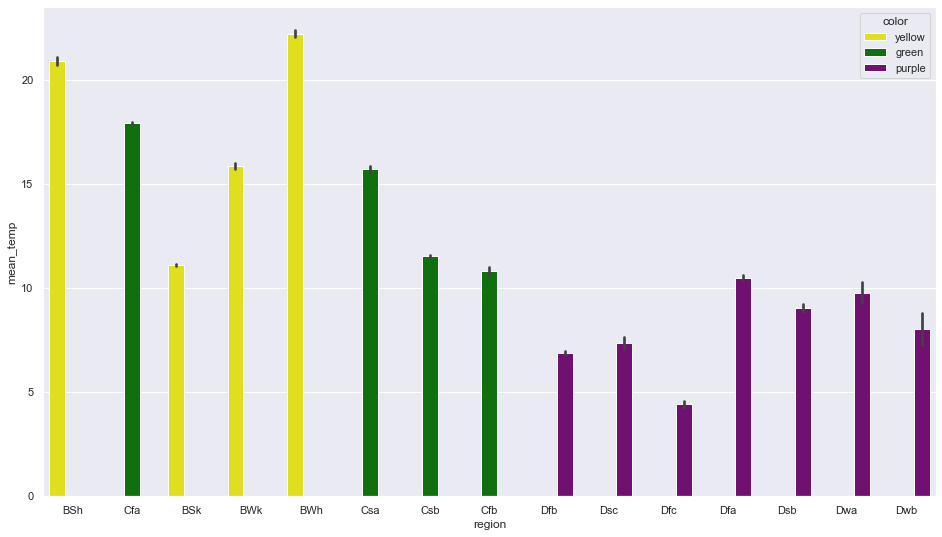

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# sample data
#data = {'Category': ['Apple', 'Banana', 'Cherry', 'Apricot', 'Blueberry', 'Cranberry'],
#        'Value': [1, 2, 3, 4, 5, 6]}

# Convert the data to a dataframe
#df = pd.DataFrame(data)

# Create a color column based on the first letter of the Category column
df['color'] = df['region'].apply(lambda x: 'yellow' if x.startswith('B') else 'green' if x.startswith('C') else 'purple')

# Plot the bar chart with colors based on the Color column
sns.barplot(x='region', y='mean_temp', hue='color', data=df, palette={'yellow': 'yellow', 'green': 'green', 'purple': 'purple'})

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# sample data
data = {'Category': ['Apple', 'Banana', 'Cherry', 'Apricot', 'Blueberry', 'Cranberry'],
        'Value': [1, 2, 3, 4, 5, 6]}

# Convert the data to a dataframe
df = pd.DataFrame(data)

# Create a color column based on the first letter of the Category column
df['Color'] = df['Category'].apply(lambda x: 'red' if x.startswith('A') else 'blue' if x.startswith('B') else 'green')

# Plot the bar chart with colors based on the Color column
sns.barplot(x='Category', y='Value', hue='Color', data=df, palette={'red': 'red', 'blue': 'blue', 'green': 'green'})

# Show the plot
plt.show()
